# Предсказание цены на подержанный автомобиль

####### Вопрос назначения цены становится актуальным, когда человек хочет продать свой автомобиль. Какую цену ставить в объявлении? Для этого нужно потратить существенное время, чтобы изучить похожие объявления на разных интернет-площадках.
Объявлений огромное количество, можно легко упустить что-то из виду, продешевить или наоборот, поставить завышенную цену 
и тем самым не привлечь потенциальных покупателей.
Мы исследуем рынок подержанных авто на примере автомобиля Kia Rio (я являюсь владельцем такого авто, и мне интересно предсказать его цену) и построим предиктивную модель.

##### Осуществим парсинг сайта auto.ru с объявлениями о продаже подержанных автомобилей Kia Rio

##### Код парсера https://github.com/FelixMusic/myprojects/blob/master/AutoRU_parser.py

In [1]:
# Импортируем необходимые для работы библиотеки и модули

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

### Обработаем данные с сайта auto.ru

In [2]:
# Загрузим данные из файла .xls

# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set.xls', index_col=None, header=None)

In [3]:
auto_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Москва,770000,https://auto.ru/cars/used/sale/kia/rio/1101217...
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Тула,709000,https://auto.ru/cars/used/sale/kia/rio/1101206...
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Калуга,695000,https://auto.ru/cars/used/sale/kia/rio/1101165...


In [4]:
# Назначим имена колонок в фрейме

auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                        'color', 'engine_volume', 'engine_power',
                        'fuel_type', 'transmission', 'drive',
                        'wheel', 'condition', 'owners_count', 
                        'passport', 'customs', 'complectation_type', 
                        'region', 'price', 'link' ]

In [5]:
auto_data.head(3)

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,drive,wheel,condition,owners_count,passport,customs,complectation_type,region,price,link
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Москва,770000,https://auto.ru/cars/used/sale/kia/rio/1101217...
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Тула,709000,https://auto.ru/cars/used/sale/kia/rio/1101206...
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Калуга,695000,https://auto.ru/cars/used/sale/kia/rio/1101165...


In [6]:
# Посмотрим размер нашего дата-сета

auto_data.shape

(1221, 19)

In [7]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   model               1221 non-null   object
 1   year                1221 non-null   object
 2   km_age              1221 non-null   object
 3   body_type           1221 non-null   object
 4   color               1221 non-null   object
 5   engine_volume       1221 non-null   object
 6   engine_power        1221 non-null   object
 7   fuel_type           1221 non-null   object
 8   transmission        1221 non-null   object
 9   drive               1221 non-null   object
 10  wheel               1221 non-null   object
 11  condition           1221 non-null   object
 12  owners_count        1221 non-null   object
 13  passport            1221 non-null   object
 14  customs             1221 non-null   object
 15  complectation_type  1221 non-null   object
 16  region              1221

In [8]:
# Уберем предложения от дилеров (новые машины) и оставим только подержанные

auto_data = auto_data.loc[auto_data['year'] != 'None']

In [9]:
auto_data.shape

(1064, 19)

In [10]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [15]:
# Посмотрим на уникальные значения некоторых колонок

columns = [ 'model', 'body_type', 'color', 'engine_volume', 'engine_power',
                        'fuel_type', 'transmission', 'drive',
                        'wheel', 'condition', 'owners_count', 
                        'passport', 'customs', 'complectation_type']

for i in columns:
    print('   ', i, ': ', len(auto_data[i].unique()), sep='')
    for j in auto_data[i].unique():
        print(j)
    print()

   model: 14
Kia Rio IV
Kia Rio III Рестайлинг
Kia Rio III
Kia Rio  III 4-speed
Kia Rio IV X-Line
Kia Rio  III 5-speed
Kia Rio I Рестайлинг
Kia Rio II Рестайлинг
Kia Rio  III 6-speed
Kia Rio II
Kia Rio  I Рестайлинг
Kia Rio I
Kia Rio  IV
Kia Rio  III Рестайлинг

   body_type: 3
седан
хэтчбек 5 дв.
универсал 5 дв.

   color: 14
белый
чёрный
серый
зелёный
бежевый
коричневый
серебристый
красный
оранжевый
голубой
синий
золотистый
жёлтый
фиолетовый

   engine_volume: 4
1.6 
1.4 
1.5 
1.3 

   engine_power: 11
123
107
100
97
98
95
112
75
105
84
108

   fuel_type: 2
 Бензин
 Бензин, газобаллонное оборудование

   transmission: 2
автоматическая
механическая

   drive: 1
передний

   wheel: 1
Левый

   condition: 1
Не требует ремонта

   owners_count: 3
1 владелец
3 или более
2 владельца

   passport: 2
Оригинал
Дубликат

   customs: 1
Растаможен

   complectation_type: 20
Комплектация
None
Комплектация Prestige AV
Комплектация Comfort Аудио
Комплектация Prestige
Комплектация Luxe
Комплектация 

In [16]:
# Столбец drive (тип привода) имеет лишь одно уникальное значение "передний", так что его тоже удалим

auto_data.drop(['drive'], axis='columns', inplace=True)

In [17]:
# Также удалим столбец wheel, т.к.расположение руля у всех автомобилей левое

auto_data.drop(['wheel'], axis='columns', inplace=True)

In [18]:
# Все автомобили растаможены, так что столбец 'customs' можно тоже удалить

auto_data.drop(['customs'], axis='columns', inplace=True)

In [19]:
# Все автомобили не требуют ремонта, удаляем столбец 'condition'

auto_data.drop(['condition'], axis='columns', inplace=True)

In [20]:
# Уникальные значения регионов

auto_data['region'].unique()

array(['Москва', 'Тула', 'Калуга', 'Старая Купавна', 'Тверь', 'Балашиха',
       'Обнинск', 'Рязань', 'Химки', 'Реутов', 'Подольск', 'Коломна',
       'Ярославль', 'Королёв', 'Электросталь', 'Голицыно', 'Иваново',
       'Зеленоград', 'Красногорск', 'Чехов', 'Павловский Посад',
       'Серпухов', 'Собинка', 'Мытищи', 'Карабаново', 'Жуковский',
       'Люберцы', 'Щелково', 'Нахабино', 'Кохма', 'Владимир', 'Клин',
       'Сергиев Посад', 'Белоусово', 'Орехово-Зуево', 'Конаково',
       'Ступино', 'Московский', 'Бронницы', 'Медынь', 'Лосино-Петровский',
       'Малоярославец', 'Ивантеевка', 'Горки', 'Железнодорожный',
       'Воскресенск', 'Ногинск', 'Киржач', 'Дубна', 'Александров',
       'Домодедово', 'Истра', 'Козельск', 'Переславль-Залесский',
       'Лыткарино', 'Малаховка', 'Протвино', 'Егорьевск', 'Куровское',
       'Раменское', 'Кольчугино', 'Удельная', 'Лихославль', 'Камешково',
       'Новый Городок', 'Кабицыно', 'Ковров', 'Ликино-Дулево', 'Пушкино',
       'Дмитров', 'Новопет

In [21]:
# Цены у официальных дилеров одинаковые по стране, поэтому предположим, что владельцы в различных регионах продают
# автомобили ориентируясь на весь общий рынок. Часто покупатель едет за автомобилем в другой регион. Удалим столбец 'region'

auto_data.drop(['region'], axis='columns', inplace=True)

In [22]:
# Количество различных моделей

len(auto_data['model'].unique())

14

In [23]:
# Можно заметить, что некоторые модели повторяются, просто между названием Kia Rio и поколением разное количество пробелов:
# где-то один пробел, а где-то два

In [24]:
# заменим в названиях моделей два пробела подряд одним пробелом, например 'Kia Rio  III' сделаем 'Kia Rio III',
# чтобы уменьшить число категорий признака 'model'

auto_data['model'] = auto_data['model'].str.replace('  ',' ')

In [25]:
# Получилось 11 различных моделей

len(auto_data['model'].unique())

11

In [26]:
# Заменим модели 'Kia Rio III 4-speed', 'Kia Rio III 5-speed', 'Kia Rio III 6-speed' на модель 'Kia Rio III'
# т.к. в данных с других сайтов данная градация отсутствует (мы увидим это позже)

In [27]:
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 4-speed','Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 5-speed','Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 6-speed','Kia Rio III')

In [28]:
for i in auto_data['model'].unique():
    print(i)

Kia Rio IV
Kia Rio III Рестайлинг
Kia Rio III
Kia Rio IV X-Line
Kia Rio I Рестайлинг
Kia Rio II Рестайлинг
Kia Rio II
Kia Rio I


In [29]:
# Посмотрим количество строк, где тип комплектации отсутствует(None) либо просто стоит одно слово 'Комплектация'

auto_data.loc[(auto_data['complectation_type'] == 'None') | (auto_data['complectation_type'] == 'Комплектация')].shape

(802, 13)

In [30]:
auto_data.shape

(1064, 13)

In [31]:
# Процент пропущенных данных

print((802 / 1064) * 100)

75.37593984962406


In [32]:
# В столбце 'complectation_type' отсутствует более 75% данных. Его тоже удаляем

auto_data.drop(['complectation_type'], axis='columns', inplace=True)

In [33]:
auto_data.head()

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,1 владелец,Оригинал,695000
3,Kia Rio III,2015,240000,седан,серый,1.4,107,Бензин,механическая,3 или более,Оригинал,350000
5,Kia Rio III,2013,115000,седан,серый,1.4,107,Бензин,механическая,2 владельца,Оригинал,410000


In [34]:
# Посмотрим количество ПТС оригиналов и дубликатов

auto_data.groupby('passport').count()['model']

passport
Дубликат     72
Оригинал    992
Name: model, dtype: int64

In [35]:
# Влияное признака 'passport' будет рассмотрено ниже

In [36]:
# В данных представлены три различных типа кузовов, их влияние на цену рассмотри ниже

In [37]:
# позиции, где не указана цена

auto_data.loc[auto_data['price'] == 'None']

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,owners_count,passport,price
965,Kia Rio III Рестайлинг,2016,89000,хэтчбек 5 дв.,белый,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,None


In [38]:
# оставим только те данные, где указана цена, т.к. цена является целевым признаком
# Если цена отсутствует - автомобиль уже продан

auto_data = auto_data.loc[auto_data['price'] != 'None']

In [39]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')
auto_data['engine_volume'] = auto_data['engine_volume'].astype('float')

In [40]:
# Удалим дубликаты строк

In [41]:
auto_data = auto_data.drop_duplicates()

In [42]:
auto_data.shape

(994, 12)

## Распределение целевого признака (цены)


 mu = 578168.89 and sigma = 207001.98



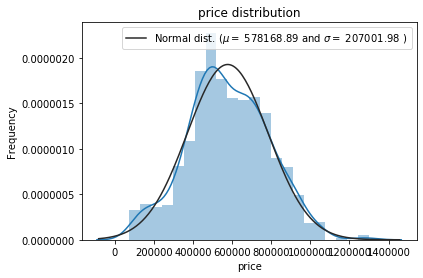

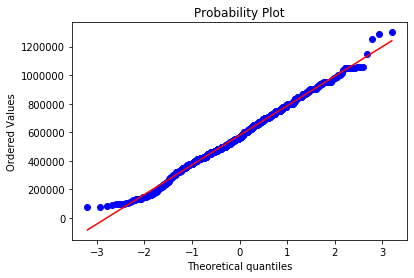

In [43]:
sns.distplot(auto_data['price'] , fit=norm)

# Получим параметры, используемые функцией
(mu, sigma) = norm.fit(auto_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Строим график распределения
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# Строим QQ-plot
fig = plt.figure()
res = stats.probplot(auto_data['price'], plot=plt)
plt.show()

In [44]:
#skewness and kurtosis
print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.071111
Kurtosis: -0.083184


#### Из графиков видно, что распределение цены близко к нормальному, условие гомоскедастичности соблюдается

In [45]:
# Заменим значение 'газобаллонное оборудование' на 'ГБО'

auto_data['fuel_type'] = auto_data['fuel_type'].str.replace('газобаллонное оборудование','ГБО')

In [46]:
for i in auto_data['fuel_type'].unique():
    print(i)

 Бензин
 Бензин, ГБО


In [47]:
# Сгруппируем данные по модельному ряду и посмотрим среднюю цену

auto_data.groupby('model')['price'].mean()

model
Kia Rio I                 118928.428571
Kia Rio I Рестайлинг      168567.567568
Kia Rio II                278719.192308
Kia Rio II Рестайлинг     355235.135135
Kia Rio III               480540.362007
Kia Rio III Рестайлинг    611198.620130
Kia Rio IV                798281.362745
Kia Rio IV X-Line         924893.153846
Name: price, dtype: float64

In [48]:
# Построим Box Plot цены по годам выпуска. Для удобства создадим фрейм данных с именем df

df = auto_data

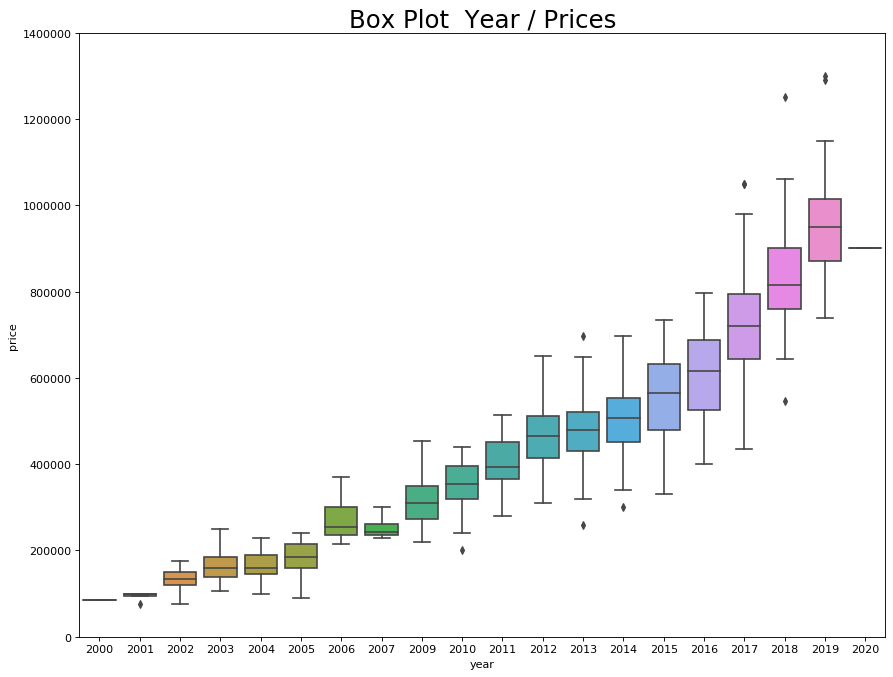

In [49]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

####### На графике присутствуют "выбросы" по цене. У дилера есть определенная линейка комплектаций, она укладывается в статистику. Если цена заметно выше, то велика вероятность, что владелец установил за дополнительную плату какое-нибудь дорогое дополнительное оборудование (диски/мультимедиа/камеры и т.п.). Такие "выбросы" лучше исключить. Если же цена очень низкая - скорее всего авто в не очень хорошем состоянии.
Пока не будем удалять выбросы, построим модель и посмотрим, какие будут результаты сначала с выбросами, а потом без них

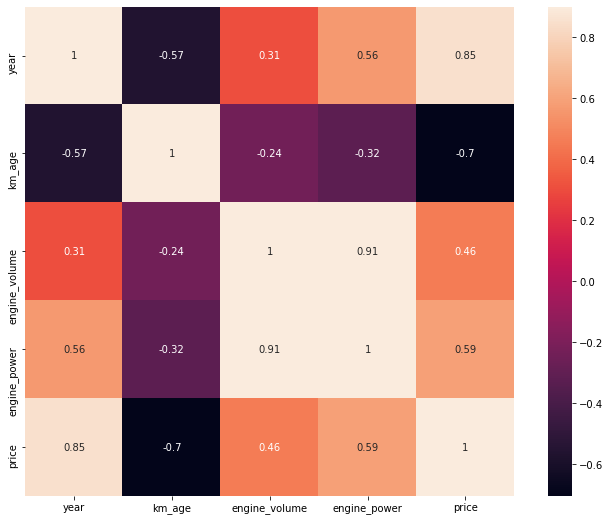

In [50]:
# посмотрим на матрицу корреляций

corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)

####### На матрице корреляций можно увидеть, что признаки 'engine_volume' и 'engine_power' сильно коррелируют между собой.
Действительно, между ними прямая взаимосвязь, чем больше объем двигателя, тем больше мощность.
Удалим 'engine_volume', т.к. при одинаковых объемах двигателя может быть различная мощность у разных поколений автомобилей

In [51]:
df.drop(['engine_volume'], axis='columns', inplace=True)

In [52]:
df.head()

,model,year,km_age,body_type,color,engine_power,fuel_type,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,белый,123,Бензин,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,123,Бензин,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,123,Бензин,механическая,1 владелец,Оригинал,695000
3,Kia Rio III,2015,240000,седан,серый,107,Бензин,механическая,3 или более,Оригинал,350000
5,Kia Rio III,2013,115000,седан,серый,107,Бензин,механическая,2 владельца,Оригинал,410000


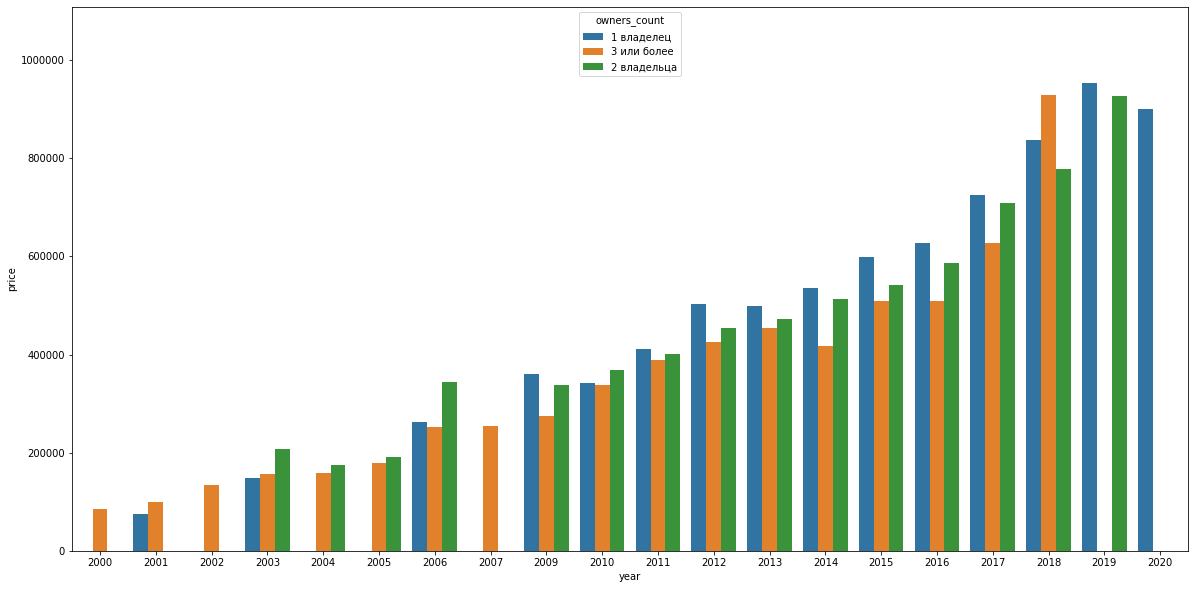

In [53]:
# Посмотрим на столбчатую диаграмму средней цены по годам в зависимости от количества владельцев

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='price', hue='owners_count', errwidth=0, data=df)

####### В большинстве годов автомобили с одним владельцем стоят дороже, дешевле с двумя и еще дешевле с 3 и более. Это не очень старые автомобили, на которые есть хороший спрос.

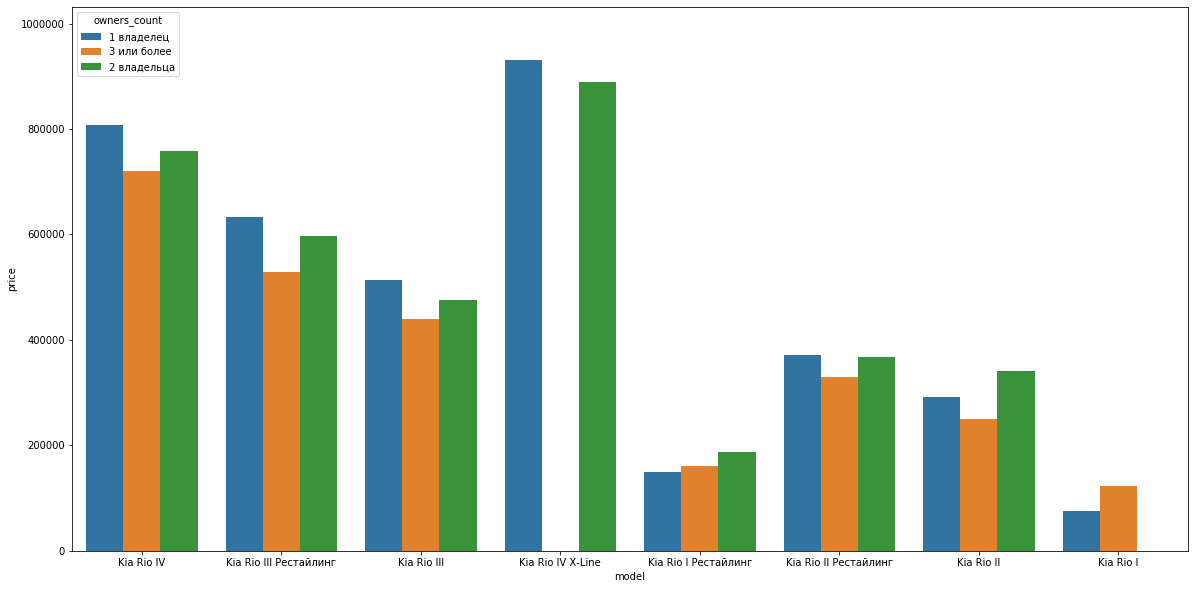

In [54]:
# Построим диаграмму цен в зависимости от количества владельцев по моделям

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='model', y='price', hue='owners_count', errwidth=0, data=df)

####### Такая же картина начиная со 2 поколения с рестайлингом.

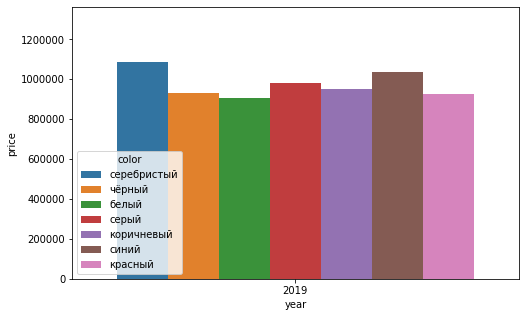

In [55]:
# Цена, в зависимости от цвета для 2019 года

plt.rcParams['figure.figsize']=(8,5)
sns.barplot(x='year', y='price', hue='color', errwidth=0, data=df.loc[df['year'] == 2019])

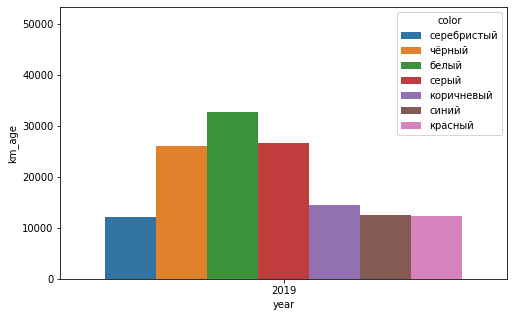

In [56]:
# Пробег овтомобилей различных цветов в 2019 году

plt.rcParams['figure.figsize']=(8,5)
sns.barplot(x='year', y='km_age', hue='color', errwidth=0, data=df.loc[df['year'] == 2019])

####### На двух последних столбчатых диаграммах мы показали автомобили 2019 года с разбивкой цены по цветам и пробега по цветам. Как видно из этих диаграмм, цвет не влияет на цену (или влияет очень несущественно при прочих равных условиях), например серебристые автомобили 2019 года имеют самую высокую среднюю цену, но при этом у них самый маленький средний пробег.
Белые автомобили (3-й столбец), напротив, имеют самую низкую цену, но самый высокий пробег, хотя белый цвет довольно популярный.

#### Проверим картину для 2018 года

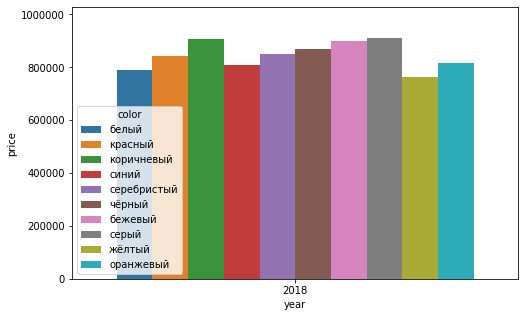

In [57]:
plt.rcParams['figure.figsize']=(8,5)
sns.barplot(x='year', y='price', hue='color', errwidth=0, data=df.loc[df['year'] == 2018])

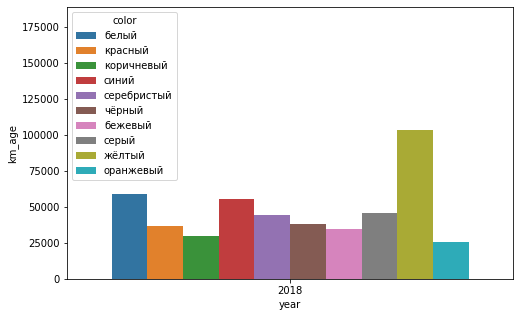

In [58]:
plt.rcParams['figure.figsize']=(8,5)
sns.barplot(x='year', y='km_age', hue='color', errwidth=0, data=df.loc[df['year'] == 2018])

###### Картина примерно такая же

In [59]:
# удалим столбец с цветом

df.drop(['color'], axis='columns', inplace=True)

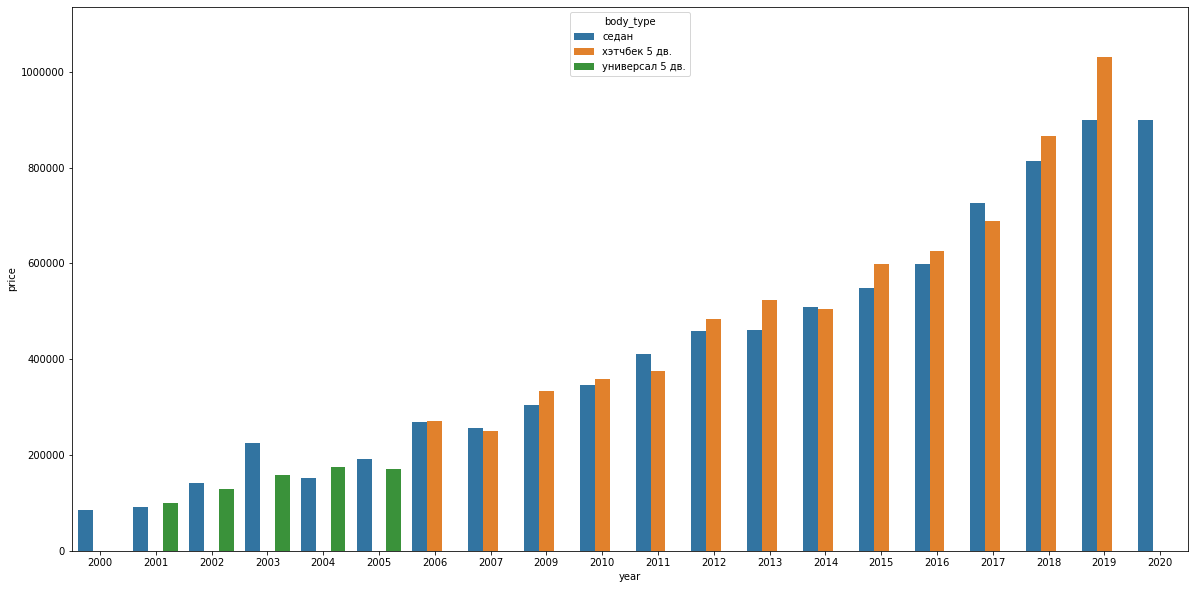

In [60]:
# Посмотрим на диаграммы цен по типу кузова по годам выпуска

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='price', hue='body_type', errwidth=0, data=df)

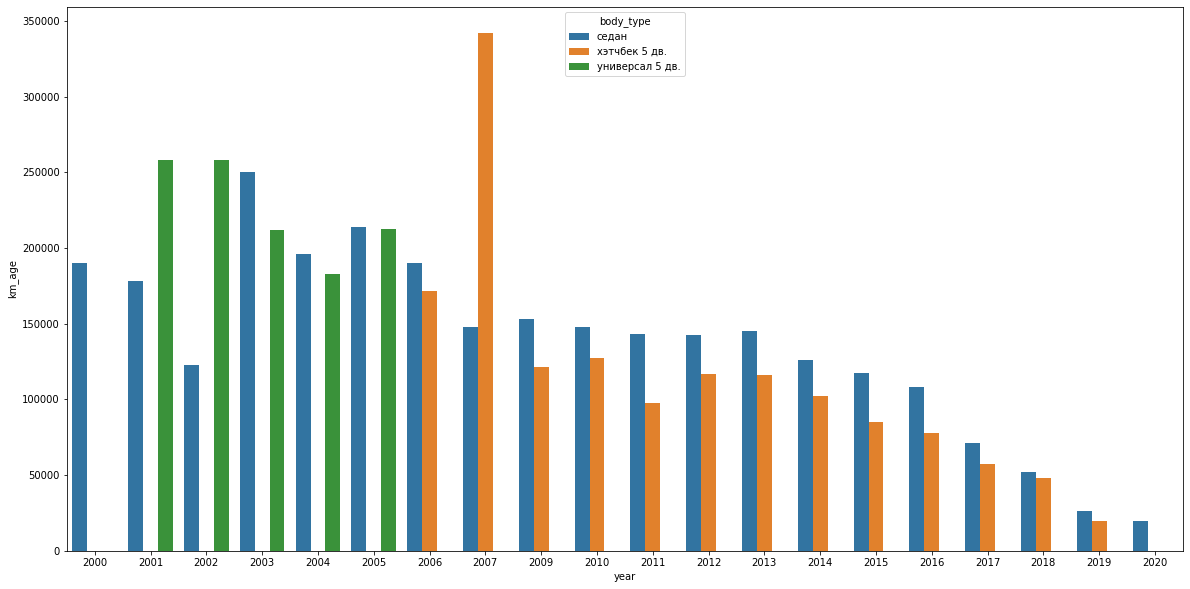

In [61]:
# Посмотрим на диаграммы пробегов по типу кузова по годам выпуска

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='km_age', hue='body_type', errwidth=0, data=df)

####### В большинстве годов выпуска хэтчбеки стоили немного дороже седанов. Но у хэтчбеков был ниже пробег по годам.
Новые хэтчбеки в автосалонах стоят немного дороже седанов, поэтому оставим этот признак.

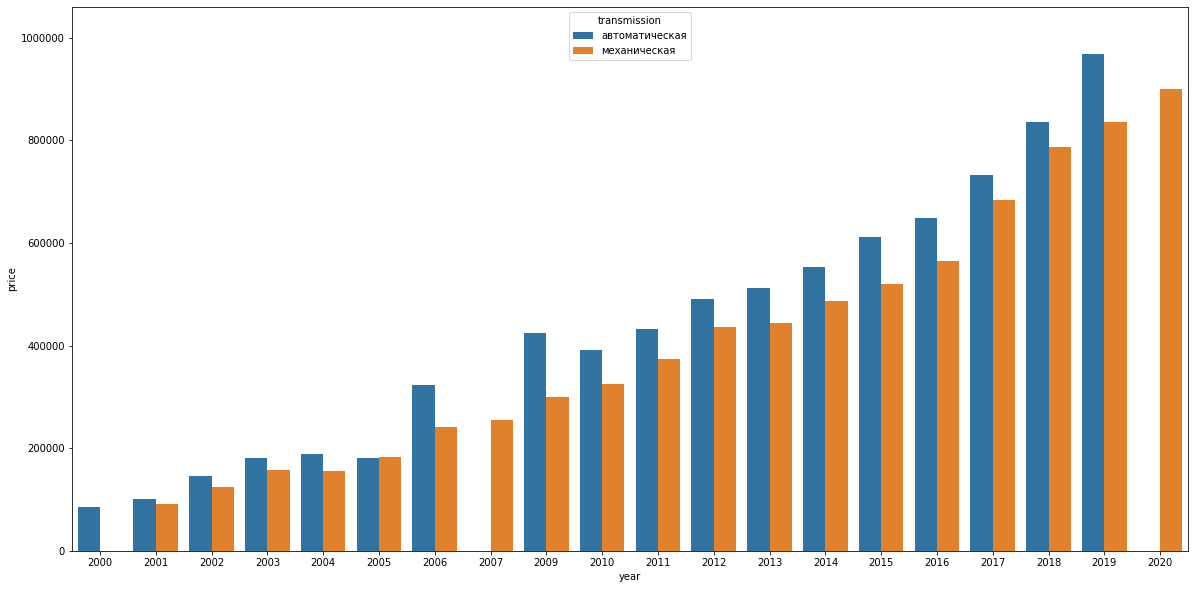

In [62]:
# Диаграмма цен по типу трансмиссии по годам

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='price', hue='transmission', errwidth=0, data=df)

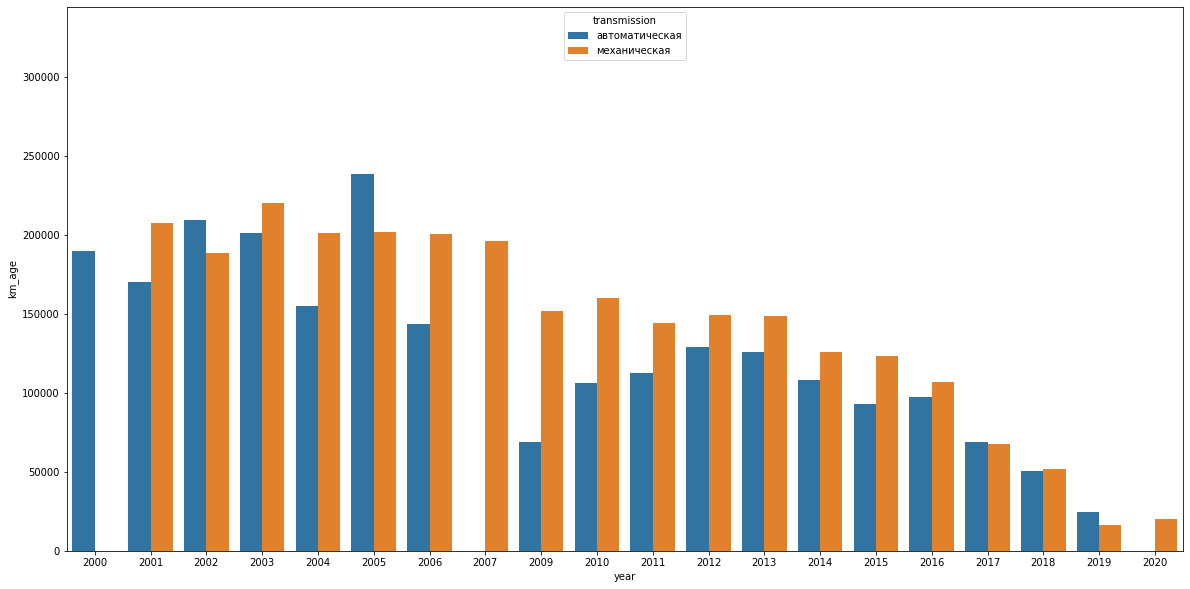

In [63]:
# Диаграмма пробегов по типу трансмиссии по годам

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='km_age', hue='transmission', errwidth=0, data=df)

####### Автомобили с автоматической трансмиссией стоят дороже, но средний пробег по годам больше на "механике". Новые автомобили на автомате стоят дороже, примем допущение, что и на подержанные распространяется такое явление.

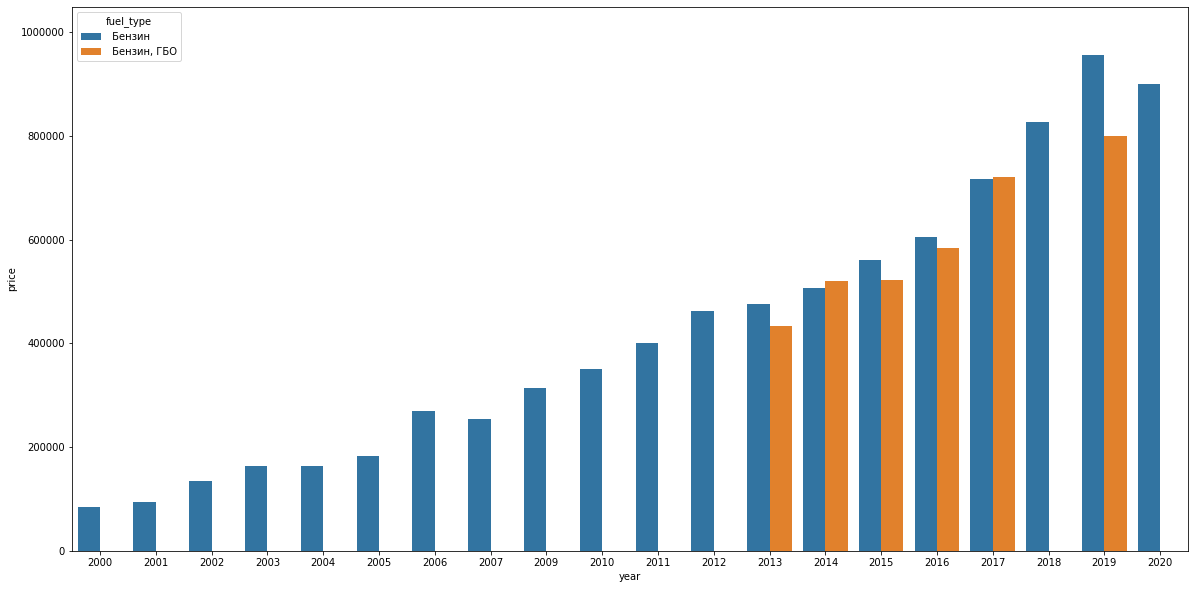

In [64]:
# Диаграмма цен по типу топлива по годам

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='price', hue='fuel_type', errwidth=0, data=df)

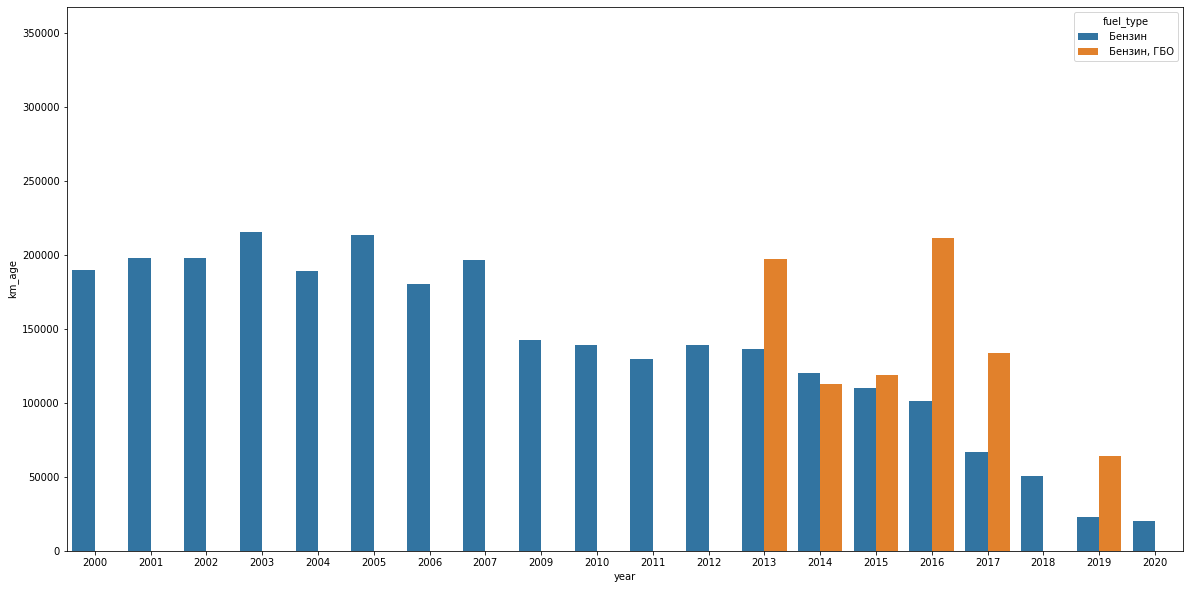

In [65]:
# Диаграмма пробегов по типу топлива по годам

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='km_age', hue='fuel_type', errwidth=0, data=df)

In [66]:
# Посмотрим количество автомобилей в группах с различными типами топлива

df.groupby('fuel_type').count()['model']

fuel_type
 Бензин         980
 Бензин, ГБО     14
Name: model, dtype: int64

####### Автомобилей, оснащенных ГБО, всего 14 в нашей выборке, 1.3%, это несущественно, тем более из двух последних графиков видно, что цена автомобилей с ГБО зависит от пробега.

In [67]:
# удалим этот столбец

df.drop(['fuel_type'], axis='columns', inplace=True)

In [68]:
df.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,Оригинал,695000
3,Kia Rio III,2015,240000,седан,107,механическая,3 или более,Оригинал,350000
5,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,Оригинал,410000


In [69]:
df.groupby('passport').count()['model']

passport
Дубликат     66
Оригинал    928
Name: model, dtype: int64

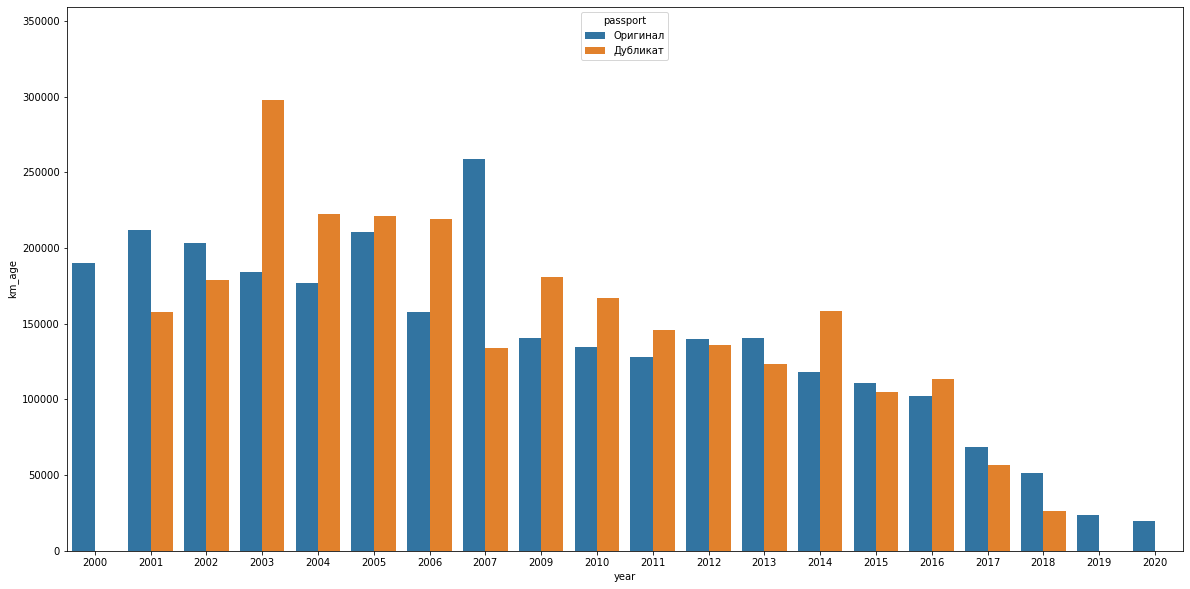

In [70]:
# Диаграмма пробегов с различными видами ПТС по годам

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='km_age', hue='passport', errwidth=0, data=df)

####### Дубликат ПТС выдается, когда закончилось место в оригинале, либо при утере/порче. Место может закончиться, если много владельцев. В принципе, ничего криминального в дубликате ПТС нет. Тем более, нами было выяснено, что наличие этого признака ухудшает модель (возрастает RMSE).

In [71]:
# Удалим колонку 'passport'

df.drop(['passport'], axis='columns', inplace=True)

In [72]:
df.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,695000
3,Kia Rio III,2015,240000,седан,107,механическая,3 или более,350000
5,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,410000


In [73]:
# Итоговые признаки для дальнейшей работы

print(df.columns.tolist())

['model', 'year', 'km_age', 'body_type', 'engine_power', 'transmission', 'owners_count', 'price']


In [74]:
# создадим фрейм под именем auto_ru_set

auto_ru_set = df

## Обработаем данные с сайта drom.ru

#### Код парсера https://github.com/FelixMusic/myprojects/blob/master/DromRU_parser.py
##### Будем извлекать только те данные, которые были оставлены выше

In [78]:
# Загрузим данные из файла .xls

# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set_DROM.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set_DROM.xls', index_col=None, header=None)

In [79]:
# Назначим имена колонок

auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                      'engine_power', 'transmission','owners_count', 
                      'price', 'link']

In [80]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [81]:
auto_data.shape

(2000, 8)

In [82]:
auto_data.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,"2 поколение, рестайлинг",2011,125589,седан,95,автомат,1 запись,364000
1,3 поколение,2012,149829,хэтчбек 5 дв.,107,механика,3 записи,375000
2,3 поколение,2014,114900,седан,123,автомат,None,627000
3,"3 поколение, рестайлинг",2016,70000,хэтчбек 5 дв.,107,автомат,2 записи,597000
4,4 поколение,2020,Пробег не указан,седан,123,автомат,None,939900


In [83]:
# Удалим все строки, где отсутствуют данные хотя бы в одном столбце

auto_data = auto_data.loc[auto_data['model'] != 'None']
auto_data = auto_data.loc[auto_data['year'] != 'None']
auto_data = auto_data.loc[auto_data['km_age'] != 'None']
auto_data = auto_data.loc[auto_data['engine_power'] != 'None']
auto_data = auto_data.loc[auto_data['transmission'] != 'None']
auto_data = auto_data.loc[auto_data['owners_count'] != 'None']
auto_data = auto_data.loc[auto_data['price'] != 'None']

In [84]:
# Оставим только те строки, где указан пробег

auto_data = auto_data.loc[auto_data['km_age'] != 'Пробег не указан']

In [107]:
auto_data.shape

(1236, 8)

In [85]:
# Посмотрим на уникальные значения некоторых колонок

columns = [ 'model', 'body_type', 'engine_power', 'transmission','owners_count']

for i in columns:
    print('   ', i, ': ', len(auto_data[i].unique()), sep='')
    for j in auto_data[i].unique():
        print(j)
    print()

   model: 7
2 поколение, рестайлинг
3 поколение
3 поколение, рестайлинг
4 поколение
1 поколение, рестайлинг
2 поколение
1 поколение

   body_type: 3
седан
хэтчбек 5 дв.
универсал

   engine_power: 7
95
107
123
97
100
96
84

   transmission: 2
автомат
механика

   owners_count: 11
1 запись
3 записи
2 записи
5 записей
4 записи
6 записей
8 записей
7 записей
9 записей
11 записей
10 записей



In [86]:
# Заменим названия модификаций, чтобы они были как в датафрейме с auto.ru

auto_data['model'] = auto_data['model'].str.replace("1 поколение",'Kia Rio I')
auto_data['model'] = auto_data['model'].str.replace("1 поколение, рестайлинг",'Kia Rio I Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("2 поколение",'Kia Rio II')
auto_data['model'] = auto_data['model'].str.replace("2 поколение, рестайлинг",'Kia Rio II Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("3 поколение",'Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace("3 поколение, рестайлинг",'Kia Rio III Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("4 поколение",'Kia Rio IV')

In [87]:
# Посмотрим результат

for i in auto_data['model'].unique():
    print(i)

Kia Rio II, рестайлинг
Kia Rio III
Kia Rio III, рестайлинг
Kia Rio IV
Kia Rio I, рестайлинг
Kia Rio II
Kia Rio I


In [88]:
# появилась лишняя запятая в названиях, возможно какой-то баг, удалим ее
# Также пропишем слово 'рестайлинг' с заглавной буквы

auto_data['model'] = auto_data['model'].str.replace(",",'')

auto_data['model'] = auto_data['model'].str.replace("рестайлинг",'Рестайлинг')

In [89]:
# Посмотрим результат

for i in auto_data['model'].unique():
    print(i)

Kia Rio II Рестайлинг
Kia Rio III
Kia Rio III Рестайлинг
Kia Rio IV
Kia Rio I Рестайлинг
Kia Rio II
Kia Rio I


In [90]:
# Заменим значения типов трансмиссии, как в данных с auto.ru

auto_data['transmission'] = auto_data['transmission'].str.replace('автомат','автоматическая')
auto_data['transmission'] = auto_data['transmission'].str.replace('механика','механическая')

In [91]:
# Заменим значения типа кузова, как в данных с auto.ru

auto_data['body_type'] = auto_data['body_type'].str.replace('универсал','универсал 5 дв.')

In [92]:
auto_data['body_type'].unique()

array(['седан', 'хэтчбек 5 дв.', 'универсал 5 дв.'], dtype=object)

In [93]:
# В дата-сете отсутствуют модели X-Line

auto_data.loc[(auto_data['model'] == 'Kia Rio IV') & (auto_data['body_type'] == 'хэтчбек 5 дв.')]

,model,year,km_age,body_type,engine_power,transmission,owners_count,price


In [94]:
# Поменяем записи по количеству владельцев

auto_data['owners_count'] = auto_data['owners_count'].str.replace('1 запись','1 владелец')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('2 записи','2 владельца')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('3 записи','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('4 записи','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('5 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('6 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('7 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('8 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('9 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('10 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('11 записей','3 или более')

In [95]:
# проверим

auto_data['owners_count'].unique()

array(['1 владелец', '3 или более', '2 владельца'], dtype=object)

In [96]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')

In [97]:
# удалим дубликаты строк

auto_data = auto_data.drop_duplicates()

### Распределение целевого признака (цены)


 mu = 579330.09 and sigma = 182006.35



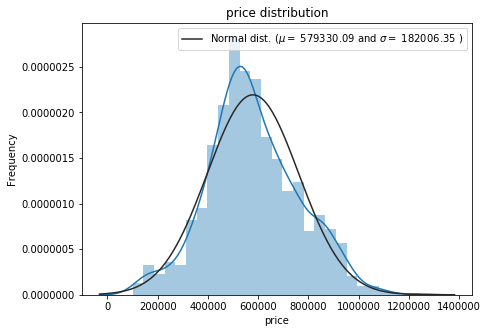

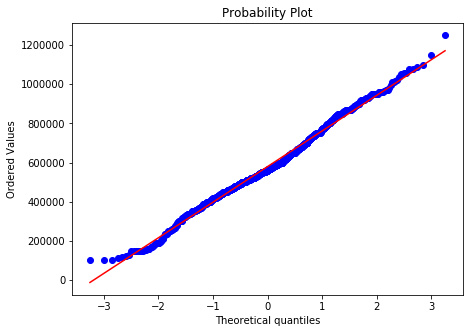

In [98]:
plt.rcParams['figure.figsize']=(7,5)
sns.distplot(auto_data['price'] , fit=norm)

# Получим параметры, используемые функцией
(mu, sigma) = norm.fit(auto_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Строим график распределения
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# Строим QQ-plot
fig = plt.figure()
res = stats.probplot(auto_data['price'], plot=plt)
plt.show()

In [99]:
#skewness and kurtosis
print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.191390
Kurtosis: 0.096398


#### Из графиков видно, что распределение цены близко к нормальному, условие гомоскедастичности соблюдается

In [100]:
# Для удобства создадим фрейм данных с именем df

df = auto_data

In [101]:
df.shape

(1233, 8)

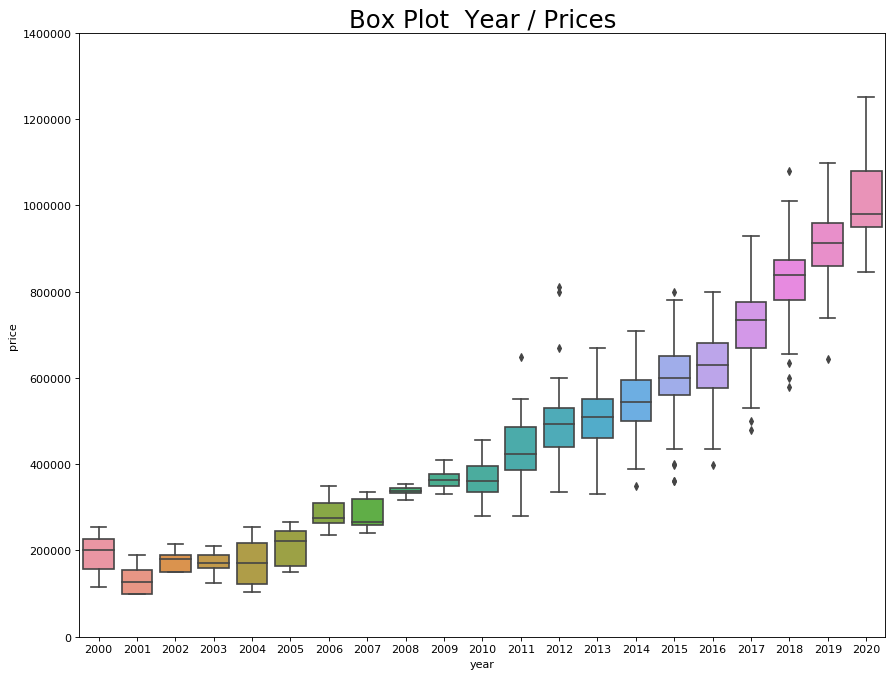

In [102]:
# Построим Box Plot цены по годам

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

##### Как и в первом случае, выбросы пока удалять не будем

In [103]:
# создадим фрейм под именем drom_ru_set

drom_ru_set = df

## Обработаем данные с сайта с avito.ru

#### Код парсера https://github.com/FelixMusic/myprojects/blob/master/Avito_AUTO_parser.py

In [104]:
# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set_Avito.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set_Avito.xls', index_col=None, header=None)

In [105]:
auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                      'engine_power', 'transmission','owners_count', 
                      'condition', 'price', 'link' ]

In [106]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [107]:
auto_data.shape

(4707, 9)

In [108]:
# Удалим все строки, где отсутствуют данные хотя бы в одном столбце

auto_data = auto_data.loc[auto_data['model'] != 'None']
auto_data = auto_data.loc[auto_data['year'] != 'None']
auto_data = auto_data.loc[auto_data['km_age'] != 'None']
auto_data = auto_data.loc[auto_data['engine_power'] != 'None']
auto_data = auto_data.loc[auto_data['transmission'] != 'None']
auto_data = auto_data.loc[auto_data['owners_count'] != 'None']
auto_data = auto_data.loc[auto_data['price'] != 'None']

In [109]:
auto_data.shape

(4328, 9)

In [110]:
# Посмотрим уникальные значения некоторых столбцов

for i in [ 'model', 'body_type', 'engine_power', 'transmission','owners_count', 'condition']:
    print('   ', i, ': ', len(auto_data[i].unique()), sep='')
    for j in auto_data[i].unique():
        print(j)
    print()

   model: 8
II рестайлинг
II
III
IV
III рестайлинг
I рестайлинг
I
IV рестайлинг

   body_type: 2
седан
хетчбэк

   engine_power: 13
97
123
107
100
95
98
108
75
105
84
109
112
82

   transmission: 2
автомат
механика

   owners_count: 4
3
2
4+
1

   condition: 2
не битый
битый



In [111]:
# Заменим значение типа трансмиссии

auto_data['transmission'] = auto_data['transmission'].str.replace('автомат','автоматическая')
auto_data['transmission'] = auto_data['transmission'].str.replace('механика','механическая')

In [112]:
# В данных присутствуют "битые" автомобили

auto_data.groupby('condition').count()['model']

condition
битый        108
не битый    4220
Name: model, dtype: int64

In [113]:
# итого 108 битых автомобилей. Исключим их

auto_data = auto_data.loc[auto_data['condition'] != 'битый']

In [114]:
# Теперь можно удалить столбец 'condition'

auto_data.drop(['condition'], axis='columns', inplace=True)

In [115]:
# Переименум названия моделей

auto_data['model'] = 'Kia Rio ' + auto_data['model']

In [116]:
auto_data['model'] = auto_data['model'].str.replace('рестайлинг','Рестайлинг')

In [117]:
for i in auto_data['model'].unique():
    print(i)

Kia Rio II Рестайлинг
Kia Rio II
Kia Rio III
Kia Rio IV
Kia Rio III Рестайлинг
Kia Rio I Рестайлинг
Kia Rio I
Kia Rio IV Рестайлинг


In [118]:
# Переименуем значения в столбце 'owners_count'

auto_data['owners_count'] = auto_data['owners_count'].str.replace('3','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('1','1 владелец')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('2','2 владельца')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('4+','3 или более')

In [119]:
for i in auto_data['owners_count'].unique():
    print(i)

3 или более
2 владельца
3 или более+
1 владелец


In [120]:
# В значении '3 или более+' уберем '+'

auto_data['owners_count'] = auto_data['owners_count'].str.replace('+','')

In [121]:
auto_data['owners_count'].unique()

array(['3 или более', '2 владельца', '1 владелец'], dtype=object)

In [122]:
# Переименуем 'хетчбэк' на 'хэтчбек 5 дв.'

auto_data['body_type'] = auto_data['body_type'].str.replace('хетчбэк','хэтчбек 5 дв.')

In [123]:
auto_data['body_type'].unique()

array(['седан', 'хэтчбек 5 дв.'], dtype=object)

In [124]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')

In [125]:
auto_data.shape

(4220, 8)

In [126]:
# удалим дубликаты строк

auto_data = auto_data.drop_duplicates()

In [127]:
# удалим новые автомобили (с очень маленьким пробегом) - предложения от дилеров

auto_data = auto_data.loc[auto_data['km_age'] > 150]

In [128]:
auto_data.shape

(4024, 8)

### Распределение целевого признака (цены)


 mu = 568955.81 and sigma = 196367.20



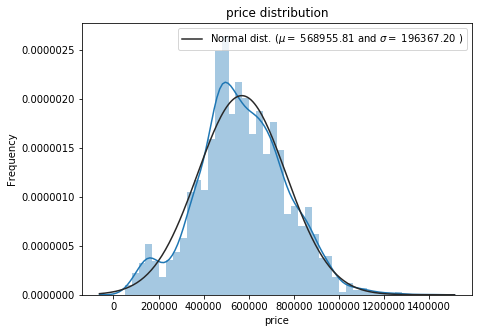

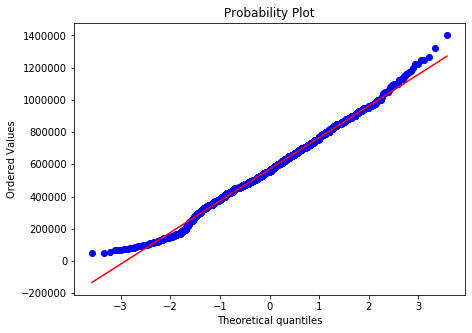

In [129]:
plt.rcParams['figure.figsize']=(7,5)
sns.distplot(auto_data['price'] , fit=norm)

# Получим параметры, используемые функцией
(mu, sigma) = norm.fit(auto_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Строим график распределения
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# Строим QQ-plot
fig = plt.figure()
res = stats.probplot(auto_data['price'], plot=plt)
plt.show()

In [130]:
#skewness and kurtosis
print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.073959
Kurtosis: 0.162472


#### Из графиков видно, что распределение цены близко к нормальному, условие гомоскедастичности соблюдается

In [131]:
# Также создадим фрейм df для удобства

df = auto_data

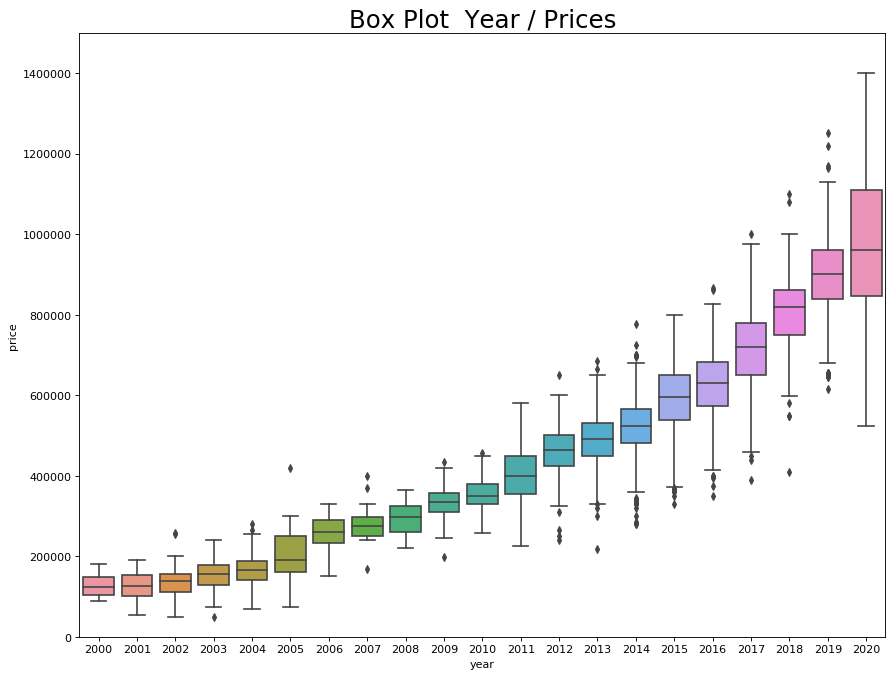

In [132]:
# Постоим Box Plot цены по годам

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

#### Выбросы пока не удаляем

In [133]:
# создадим фрейм под именем avito_ru_set

avito_ru_set = df

### Итого, мы имеем три набора данных с разных сайтов

In [134]:
auto_ru_set.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,695000
3,Kia Rio III,2015,240000,седан,107,механическая,3 или более,350000
5,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,410000


In [135]:
drom_ru_set.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio II Рестайлинг,2011,125589,седан,95,автоматическая,1 владелец,364000
1,Kia Rio III,2012,149829,хэтчбек 5 дв.,107,механическая,3 или более,375000
3,Kia Rio III Рестайлинг,2016,70000,хэтчбек 5 дв.,107,автоматическая,2 владельца,597000
8,Kia Rio III Рестайлинг,2016,101000,седан,107,автоматическая,1 владелец,640000
10,Kia Rio IV,2017,63000,седан,123,механическая,1 владелец,759000


In [136]:
avito_ru_set.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio II Рестайлинг,2009,169700,седан,97,автоматическая,3 или более,340000
1,Kia Rio II,2007,290000,седан,97,автоматическая,2 владельца,290000
2,Kia Rio III,2011,132000,седан,123,автоматическая,3 или более,485000
3,Kia Rio III,2012,93000,хэтчбек 5 дв.,123,механическая,1 владелец,450000
4,Kia Rio III,2012,150000,седан,107,механическая,3 или более,429000


### Объединим все три набора в один

In [137]:
new_df = pd.concat([auto_ru_set, drom_ru_set, avito_ru_set], ignore_index=True)

In [138]:
new_df.shape

(6251, 8)

In [139]:
# удалим дубликаты, на разных сайтах объявления могут совпадать

new_df = new_df.drop_duplicates()

In [140]:
new_df.shape

(6012, 8)

#### Итак, мы получили один итоговый набор данных, соединив три фрейма с разных площадок

In [141]:
df = new_df


 mu = 568955.81 and sigma = 196367.20



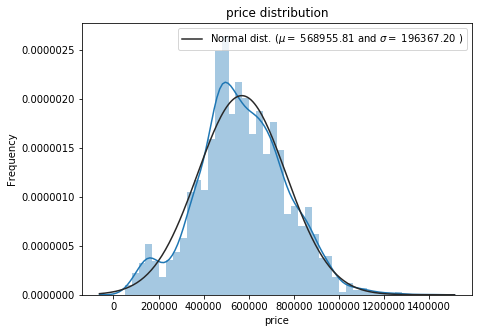

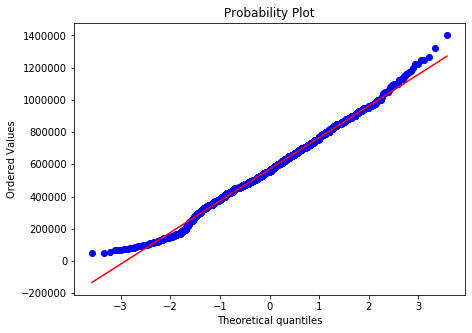

In [142]:
# Посмотрим, как распределена цена

plt.rcParams['figure.figsize']=(7,5)
sns.distplot(auto_data['price'] , fit=norm)

# Получим параметры, используемые функцией
(mu, sigma) = norm.fit(auto_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Строим график распределения
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# Строим QQ-plot
fig = plt.figure()
res = stats.probplot(auto_data['price'], plot=plt)
plt.show()

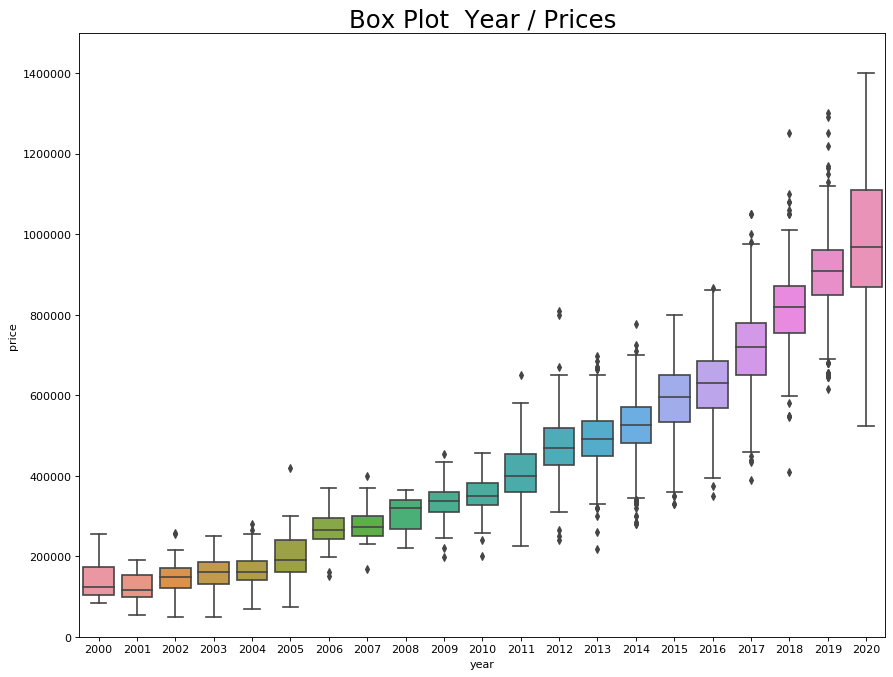

In [143]:
# Постоим Box Plot цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

# Алгоритм CatBoost

#### Назначаем X и y

In [144]:
X = df.drop(['price'], axis=1)
y = df['price']

#### Подберем гиперпараметры регрессора, используя кроссвалидацию
#### Разобъем данные на тренировочные и тестовые, test_size=0.25

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3,4,5],
              'learning_rate' : [0.03,0.05, 0.1],
              'iterations'    : [800],
              'subsample'     : [0.3, 0.5, 1]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

0:	learn: 192543.7032428	total: 138ms	remaining: 1m 49s
1:	learn: 188419.2138160	total: 142ms	remaining: 56.7s
2:	learn: 184155.1607222	total: 146ms	remaining: 38.7s
3:	learn: 179965.4135849	total: 150ms	remaining: 29.8s
4:	learn: 176072.2797809	total: 153ms	remaining: 24.3s
5:	learn: 172218.7206600	total: 156ms	remaining: 20.7s
6:	learn: 168508.5959635	total: 160ms	remaining: 18.2s
7:	learn: 164890.2720884	total: 164ms	remaining: 16.3s
8:	learn: 161425.1685715	total: 168ms	remaining: 14.8s
9:	learn: 158005.6172397	total: 171ms	remaining: 13.5s
10:	learn: 154636.8455616	total: 175ms	remaining: 12.5s
11:	learn: 151503.0765008	total: 179ms	remaining: 11.7s
12:	learn: 148392.7741976	total: 182ms	remaining: 11s
13:	learn: 145403.7116308	total: 185ms	remaining: 10.4s
14:	learn: 142592.5799636	total: 188ms	remaining: 9.82s
15:	learn: 139882.2098477	total: 191ms	remaining: 9.38s
16:	learn: 137096.3579726	total: 195ms	remaining: 8.98s
17:	learn: 134362.4565461	total: 198ms	remaining: 8.6s
18:	

175:	learn: 56247.3036385	total: 642ms	remaining: 2.28s
176:	learn: 56212.1034501	total: 645ms	remaining: 2.27s
177:	learn: 56179.1023220	total: 648ms	remaining: 2.26s
178:	learn: 56159.4994942	total: 650ms	remaining: 2.25s
179:	learn: 56145.0508659	total: 653ms	remaining: 2.25s
180:	learn: 56123.7150676	total: 655ms	remaining: 2.24s
181:	learn: 56101.0983839	total: 659ms	remaining: 2.24s
182:	learn: 56064.9840756	total: 662ms	remaining: 2.23s
183:	learn: 56029.1279724	total: 665ms	remaining: 2.22s
184:	learn: 55998.5740309	total: 667ms	remaining: 2.22s
185:	learn: 55976.8590086	total: 670ms	remaining: 2.21s
186:	learn: 55942.7505111	total: 673ms	remaining: 2.21s
187:	learn: 55923.0304611	total: 674ms	remaining: 2.19s
188:	learn: 55898.8823203	total: 678ms	remaining: 2.19s
189:	learn: 55872.4147523	total: 682ms	remaining: 2.19s
190:	learn: 55858.5021182	total: 685ms	remaining: 2.18s
191:	learn: 55839.8392356	total: 688ms	remaining: 2.18s
192:	learn: 55814.0355085	total: 691ms	remaining

351:	learn: 53916.8266426	total: 1.16s	remaining: 1.48s
352:	learn: 53906.7722065	total: 1.16s	remaining: 1.47s
353:	learn: 53897.1905295	total: 1.17s	remaining: 1.47s
354:	learn: 53896.5202847	total: 1.17s	remaining: 1.46s
355:	learn: 53895.0637858	total: 1.17s	remaining: 1.46s
356:	learn: 53889.5664300	total: 1.17s	remaining: 1.45s
357:	learn: 53881.2107862	total: 1.17s	remaining: 1.45s
358:	learn: 53873.8211287	total: 1.17s	remaining: 1.44s
359:	learn: 53866.7950991	total: 1.18s	remaining: 1.44s
360:	learn: 53861.1505219	total: 1.18s	remaining: 1.44s
361:	learn: 53854.7549340	total: 1.18s	remaining: 1.43s
362:	learn: 53846.5742497	total: 1.19s	remaining: 1.43s
363:	learn: 53839.3376690	total: 1.19s	remaining: 1.43s
364:	learn: 53832.4457689	total: 1.19s	remaining: 1.42s
365:	learn: 53830.1785166	total: 1.2s	remaining: 1.42s
366:	learn: 53829.5659392	total: 1.2s	remaining: 1.41s
367:	learn: 53820.7964008	total: 1.2s	remaining: 1.41s
368:	learn: 53820.2069306	total: 1.2s	remaining: 1.

554:	learn: 52917.9214211	total: 1.64s	remaining: 723ms
555:	learn: 52915.1452973	total: 1.64s	remaining: 719ms
556:	learn: 52914.9228239	total: 1.64s	remaining: 715ms
557:	learn: 52910.2903914	total: 1.64s	remaining: 712ms
558:	learn: 52907.3571556	total: 1.64s	remaining: 709ms
559:	learn: 52907.2105200	total: 1.65s	remaining: 705ms
560:	learn: 52901.5893760	total: 1.65s	remaining: 701ms
561:	learn: 52900.3785441	total: 1.65s	remaining: 698ms
562:	learn: 52894.3749773	total: 1.65s	remaining: 695ms
563:	learn: 52888.3459938	total: 1.65s	remaining: 692ms
564:	learn: 52882.8977039	total: 1.66s	remaining: 689ms
565:	learn: 52874.7735823	total: 1.66s	remaining: 686ms
566:	learn: 52872.1108675	total: 1.66s	remaining: 682ms
567:	learn: 52866.1072145	total: 1.66s	remaining: 679ms
568:	learn: 52860.8410452	total: 1.66s	remaining: 675ms
569:	learn: 52860.2878452	total: 1.66s	remaining: 672ms
570:	learn: 52852.7140085	total: 1.67s	remaining: 668ms
571:	learn: 52852.4990205	total: 1.67s	remaining

713:	learn: 52374.5269050	total: 1.97s	remaining: 238ms
714:	learn: 52372.3771798	total: 1.98s	remaining: 235ms
715:	learn: 52369.6017458	total: 1.98s	remaining: 232ms
716:	learn: 52365.5899861	total: 1.98s	remaining: 229ms
717:	learn: 52358.2470045	total: 1.98s	remaining: 226ms
718:	learn: 52354.5604555	total: 1.98s	remaining: 224ms
719:	learn: 52354.4653417	total: 1.99s	remaining: 221ms
720:	learn: 52351.8155425	total: 1.99s	remaining: 218ms
721:	learn: 52350.8488403	total: 1.99s	remaining: 215ms
722:	learn: 52343.0561298	total: 1.99s	remaining: 212ms
723:	learn: 52339.4140517	total: 2s	remaining: 210ms
724:	learn: 52338.4882424	total: 2s	remaining: 207ms
725:	learn: 52331.5514065	total: 2s	remaining: 204ms
726:	learn: 52326.9796611	total: 2s	remaining: 201ms
727:	learn: 52326.8340806	total: 2s	remaining: 198ms
728:	learn: 52324.2903543	total: 2s	remaining: 195ms
729:	learn: 52317.7164612	total: 2.01s	remaining: 192ms
730:	learn: 52316.5490630	total: 2.01s	remaining: 189ms
731:	learn

In [146]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=1,
                          depth=4)

In [147]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 192543.7032428	total: 4.54ms	remaining: 3.63s
1:	learn: 188419.2138160	total: 9.35ms	remaining: 3.73s
2:	learn: 184155.1607222	total: 13.5ms	remaining: 3.58s
3:	learn: 179965.4135849	total: 17.8ms	remaining: 3.54s
4:	learn: 176072.2797809	total: 21.3ms	remaining: 3.38s
5:	learn: 172218.7206600	total: 24.8ms	remaining: 3.28s
6:	learn: 168508.5959635	total: 29.9ms	remaining: 3.39s
7:	learn: 164890.2720884	total: 33.9ms	remaining: 3.36s
8:	learn: 161425.1685715	total: 38ms	remaining: 3.34s
9:	learn: 158005.6172397	total: 41.5ms	remaining: 3.28s
10:	learn: 154636.8455616	total: 44.9ms	remaining: 3.22s
11:	learn: 151503.0765008	total: 48.9ms	remaining: 3.21s
12:	learn: 148392.7741976	total: 52.2ms	remaining: 3.16s
13:	learn: 145403.7116308	total: 55.7ms	remaining: 3.12s
14:	learn: 142592.5799636	total: 58.9ms	remaining: 3.08s
15:	learn: 139882.2098477	total: 62.8ms	remaining: 3.08s
16:	learn: 137096.3579726	total: 69ms	remaining: 3.17s
17:	learn: 134362.4565461	total: 74.6ms	remai

176:	learn: 56212.1034501	total: 500ms	remaining: 1.76s
177:	learn: 56179.1023220	total: 503ms	remaining: 1.76s
178:	learn: 56159.4994942	total: 505ms	remaining: 1.75s
179:	learn: 56145.0508659	total: 508ms	remaining: 1.75s
180:	learn: 56123.7150676	total: 510ms	remaining: 1.74s
181:	learn: 56101.0983839	total: 513ms	remaining: 1.74s
182:	learn: 56064.9840756	total: 517ms	remaining: 1.74s
183:	learn: 56029.1279724	total: 520ms	remaining: 1.74s
184:	learn: 55998.5740309	total: 522ms	remaining: 1.74s
185:	learn: 55976.8590086	total: 526ms	remaining: 1.74s
186:	learn: 55942.7505111	total: 529ms	remaining: 1.74s
187:	learn: 55923.0304611	total: 531ms	remaining: 1.73s
188:	learn: 55898.8823203	total: 535ms	remaining: 1.73s
189:	learn: 55872.4147523	total: 539ms	remaining: 1.73s
190:	learn: 55858.5021182	total: 542ms	remaining: 1.73s
191:	learn: 55839.8392356	total: 545ms	remaining: 1.73s
192:	learn: 55814.0355085	total: 548ms	remaining: 1.72s
193:	learn: 55783.2677967	total: 551ms	remaining

373:	learn: 53787.3211784	total: 995ms	remaining: 1.13s
374:	learn: 53786.8033851	total: 997ms	remaining: 1.13s
375:	learn: 53777.7948233	total: 999ms	remaining: 1.13s
376:	learn: 53771.8863319	total: 1s	remaining: 1.13s
377:	learn: 53771.3498362	total: 1s	remaining: 1.12s
378:	learn: 53762.8029542	total: 1s	remaining: 1.12s
379:	learn: 53748.2053293	total: 1.01s	remaining: 1.11s
380:	learn: 53735.8987300	total: 1.01s	remaining: 1.11s
381:	learn: 53725.3420728	total: 1.02s	remaining: 1.11s
382:	learn: 53718.7727553	total: 1.02s	remaining: 1.11s
383:	learn: 53703.7602196	total: 1.02s	remaining: 1.1s
384:	learn: 53694.0236903	total: 1.02s	remaining: 1.1s
385:	learn: 53686.8929291	total: 1.03s	remaining: 1.1s
386:	learn: 53678.7145033	total: 1.03s	remaining: 1.1s
387:	learn: 53671.8521721	total: 1.04s	remaining: 1.1s
388:	learn: 53664.4823225	total: 1.04s	remaining: 1.1s
389:	learn: 53659.7874464	total: 1.04s	remaining: 1.1s
390:	learn: 53651.7466176	total: 1.05s	remaining: 1.1s
391:	lear

571:	learn: 52852.4990205	total: 1.49s	remaining: 594ms
572:	learn: 52846.9209213	total: 1.49s	remaining: 592ms
573:	learn: 52838.9101809	total: 1.5s	remaining: 589ms
574:	learn: 52835.5212304	total: 1.5s	remaining: 587ms
575:	learn: 52834.5142551	total: 1.5s	remaining: 584ms
576:	learn: 52833.5553703	total: 1.5s	remaining: 581ms
577:	learn: 52829.7030609	total: 1.51s	remaining: 579ms
578:	learn: 52825.6010302	total: 1.51s	remaining: 577ms
579:	learn: 52824.8817967	total: 1.51s	remaining: 575ms
580:	learn: 52820.9373849	total: 1.52s	remaining: 572ms
581:	learn: 52815.3069278	total: 1.52s	remaining: 569ms
582:	learn: 52810.1384836	total: 1.52s	remaining: 566ms
583:	learn: 52809.2294840	total: 1.52s	remaining: 563ms
584:	learn: 52804.5879133	total: 1.52s	remaining: 560ms
585:	learn: 52803.7219777	total: 1.52s	remaining: 557ms
586:	learn: 52798.2235755	total: 1.53s	remaining: 555ms
587:	learn: 52793.5305706	total: 1.53s	remaining: 552ms
588:	learn: 52788.3901013	total: 1.53s	remaining: 54

750:	learn: 52264.8916008	total: 1.82s	remaining: 119ms
751:	learn: 52260.7837601	total: 1.82s	remaining: 116ms
752:	learn: 52256.8861652	total: 1.82s	remaining: 114ms
753:	learn: 52254.5251086	total: 1.82s	remaining: 111ms
754:	learn: 52250.6679099	total: 1.82s	remaining: 109ms
755:	learn: 52248.4484395	total: 1.82s	remaining: 106ms
756:	learn: 52246.8407765	total: 1.83s	remaining: 104ms
757:	learn: 52245.6290571	total: 1.83s	remaining: 101ms
758:	learn: 52245.1030107	total: 1.83s	remaining: 99.1ms
759:	learn: 52242.9746699	total: 1.83s	remaining: 96.6ms
760:	learn: 52234.6760014	total: 1.84s	remaining: 94.2ms
761:	learn: 52231.8893927	total: 1.84s	remaining: 91.9ms
762:	learn: 52225.8339385	total: 1.84s	remaining: 89.4ms
763:	learn: 52220.0498774	total: 1.84s	remaining: 86.9ms
764:	learn: 52218.8009039	total: 1.85s	remaining: 84.5ms
765:	learn: 52214.3201118	total: 1.85s	remaining: 82.2ms
766:	learn: 52211.5742533	total: 1.85s	remaining: 79.8ms
767:	learn: 52211.4721405	total: 1.86s	

In [148]:
# Предсказываем цену на тестовом наборе

preds = model.predict(X_test)

In [149]:
# Вычисляем ошибку

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 59296.882289


### Теперь удалим выбросы и посмотрим, как изменится RMSE

In [150]:
# удалим выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

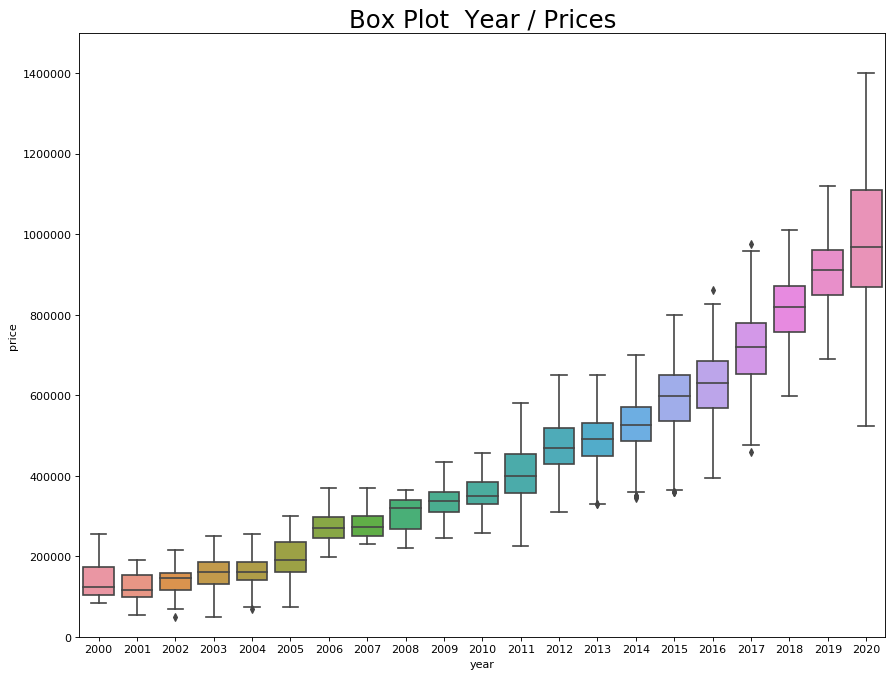

In [151]:
# Постоим Box Plot цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

In [152]:
# еще раз удалим выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

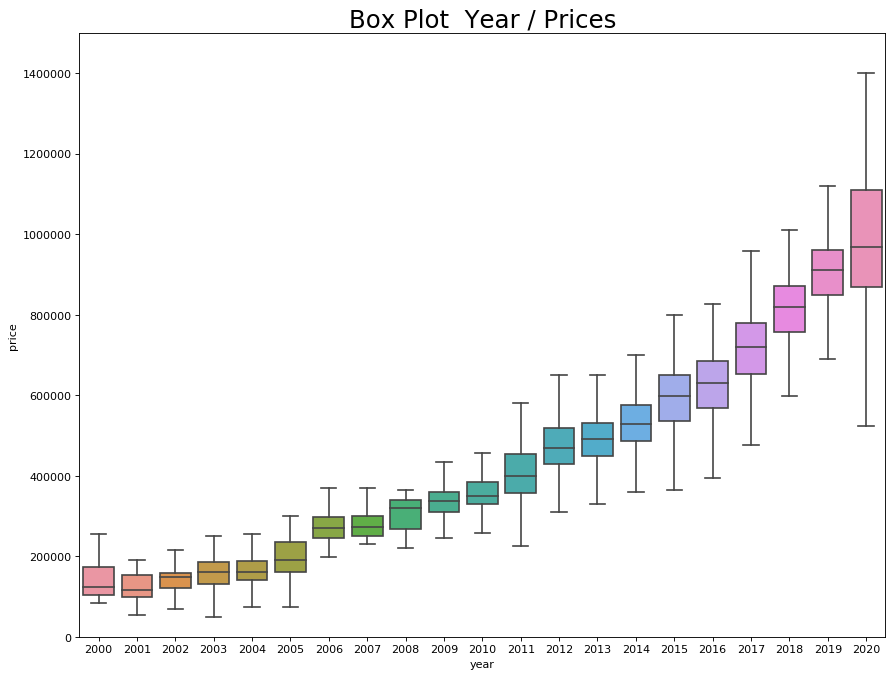

In [153]:
# Постоим Box Plot цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

In [154]:
X = df.drop(['price'], axis=1)
y = df['price']

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3,4,5],
              'learning_rate' : [0.03,0.05, 0.1],
              'iterations'    : [800],
              'subsample'     : [0.3, 0.5, 1]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

0:	learn: 188508.3879196	total: 5.67ms	remaining: 4.53s
1:	learn: 184226.6760991	total: 12ms	remaining: 4.78s
2:	learn: 180029.5547197	total: 15.1ms	remaining: 4.02s
3:	learn: 175949.4996621	total: 18ms	remaining: 3.58s
4:	learn: 171909.8530416	total: 22.5ms	remaining: 3.58s
5:	learn: 168050.6395215	total: 25.5ms	remaining: 3.38s
6:	learn: 164517.7018752	total: 28.4ms	remaining: 3.21s
7:	learn: 160966.6956758	total: 31ms	remaining: 3.07s
8:	learn: 157410.3855009	total: 34.3ms	remaining: 3.02s
9:	learn: 154092.7560079	total: 38ms	remaining: 3s
10:	learn: 150922.9824232	total: 41.4ms	remaining: 2.97s
11:	learn: 147697.6040209	total: 44.2ms	remaining: 2.9s
12:	learn: 144545.8924383	total: 47.4ms	remaining: 2.87s
13:	learn: 141579.8230134	total: 50ms	remaining: 2.81s
14:	learn: 138752.6579713	total: 53.1ms	remaining: 2.78s
15:	learn: 135903.3071845	total: 56.3ms	remaining: 2.76s
16:	learn: 133178.9463843	total: 58.9ms	remaining: 2.71s
17:	learn: 130501.5941277	total: 62.4ms	remaining: 2.71

173:	learn: 53866.2497169	total: 509ms	remaining: 1.83s
174:	learn: 53832.5469488	total: 512ms	remaining: 1.83s
175:	learn: 53817.3061429	total: 515ms	remaining: 1.82s
176:	learn: 53796.6171708	total: 517ms	remaining: 1.82s
177:	learn: 53776.5248183	total: 520ms	remaining: 1.82s
178:	learn: 53752.6703796	total: 523ms	remaining: 1.81s
179:	learn: 53737.3939912	total: 526ms	remaining: 1.81s
180:	learn: 53714.6449716	total: 529ms	remaining: 1.81s
181:	learn: 53698.8234179	total: 532ms	remaining: 1.81s
182:	learn: 53675.4856151	total: 535ms	remaining: 1.8s
183:	learn: 53652.8570661	total: 538ms	remaining: 1.8s
184:	learn: 53638.3884002	total: 541ms	remaining: 1.8s
185:	learn: 53627.5683233	total: 543ms	remaining: 1.79s
186:	learn: 53613.6340133	total: 547ms	remaining: 1.79s
187:	learn: 53595.8232568	total: 549ms	remaining: 1.79s
188:	learn: 53580.5060173	total: 551ms	remaining: 1.78s
189:	learn: 53555.5583070	total: 553ms	remaining: 1.78s
190:	learn: 53531.8093849	total: 555ms	remaining: 1

375:	learn: 51677.4022387	total: 1.01s	remaining: 1.14s
376:	learn: 51666.9644791	total: 1.01s	remaining: 1.13s
377:	learn: 51664.0533716	total: 1.01s	remaining: 1.13s
378:	learn: 51656.7751526	total: 1.02s	remaining: 1.13s
379:	learn: 51650.1027478	total: 1.02s	remaining: 1.13s
380:	learn: 51644.5678804	total: 1.02s	remaining: 1.12s
381:	learn: 51643.5049263	total: 1.02s	remaining: 1.12s
382:	learn: 51639.6417675	total: 1.02s	remaining: 1.11s
383:	learn: 51629.1487064	total: 1.03s	remaining: 1.11s
384:	learn: 51624.4115178	total: 1.03s	remaining: 1.11s
385:	learn: 51622.5657390	total: 1.03s	remaining: 1.11s
386:	learn: 51618.9258507	total: 1.03s	remaining: 1.1s
387:	learn: 51611.5344191	total: 1.03s	remaining: 1.1s
388:	learn: 51605.6389699	total: 1.04s	remaining: 1.09s
389:	learn: 51598.0784763	total: 1.04s	remaining: 1.09s
390:	learn: 51589.4709275	total: 1.04s	remaining: 1.09s
391:	learn: 51587.7227294	total: 1.04s	remaining: 1.08s
392:	learn: 51581.7826485	total: 1.04s	remaining: 

555:	learn: 50847.3084158	total: 1.51s	remaining: 663ms
556:	learn: 50834.7498096	total: 1.51s	remaining: 661ms
557:	learn: 50831.4618684	total: 1.52s	remaining: 658ms
558:	learn: 50823.1540461	total: 1.52s	remaining: 655ms
559:	learn: 50814.6325151	total: 1.52s	remaining: 653ms
560:	learn: 50809.9122076	total: 1.53s	remaining: 651ms
561:	learn: 50809.3790226	total: 1.53s	remaining: 647ms
562:	learn: 50807.2170764	total: 1.53s	remaining: 644ms
563:	learn: 50802.7480030	total: 1.53s	remaining: 642ms
564:	learn: 50796.5566671	total: 1.54s	remaining: 640ms
565:	learn: 50793.8763742	total: 1.54s	remaining: 638ms
566:	learn: 50788.5686053	total: 1.54s	remaining: 635ms
567:	learn: 50786.8445369	total: 1.55s	remaining: 633ms
568:	learn: 50785.2016592	total: 1.55s	remaining: 630ms
569:	learn: 50783.7216504	total: 1.56s	remaining: 628ms
570:	learn: 50772.6177548	total: 1.56s	remaining: 625ms
571:	learn: 50770.7459116	total: 1.56s	remaining: 623ms
572:	learn: 50765.3409231	total: 1.57s	remaining

745:	learn: 50193.5118599	total: 2.01s	remaining: 145ms
746:	learn: 50191.7245197	total: 2.01s	remaining: 143ms
747:	learn: 50188.5271019	total: 2.01s	remaining: 140ms
748:	learn: 50180.1379707	total: 2.02s	remaining: 137ms
749:	learn: 50177.9781006	total: 2.02s	remaining: 135ms
750:	learn: 50175.3390314	total: 2.02s	remaining: 132ms
751:	learn: 50175.1326963	total: 2.02s	remaining: 129ms
752:	learn: 50170.0739200	total: 2.02s	remaining: 126ms
753:	learn: 50169.8897389	total: 2.03s	remaining: 124ms
754:	learn: 50166.4164088	total: 2.03s	remaining: 121ms
755:	learn: 50163.5218437	total: 2.03s	remaining: 118ms
756:	learn: 50160.6340436	total: 2.03s	remaining: 116ms
757:	learn: 50157.7841195	total: 2.04s	remaining: 113ms
758:	learn: 50155.9031027	total: 2.04s	remaining: 110ms
759:	learn: 50154.9842536	total: 2.04s	remaining: 107ms
760:	learn: 50151.5944363	total: 2.04s	remaining: 105ms
761:	learn: 50149.9258406	total: 2.04s	remaining: 102ms
762:	learn: 50149.7967282	total: 2.05s	remaining

In [156]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=0.5,
                          depth=4)

In [157]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 188508.3879196	total: 4.54ms	remaining: 3.63s
1:	learn: 184226.6760991	total: 9.19ms	remaining: 3.66s
2:	learn: 180029.5547197	total: 12.7ms	remaining: 3.38s
3:	learn: 175949.4996621	total: 16.2ms	remaining: 3.22s
4:	learn: 171909.8530416	total: 21.2ms	remaining: 3.37s
5:	learn: 168050.6395215	total: 25.5ms	remaining: 3.37s
6:	learn: 164517.7018752	total: 29.2ms	remaining: 3.31s
7:	learn: 160966.6956758	total: 32.3ms	remaining: 3.2s
8:	learn: 157410.3855009	total: 36.7ms	remaining: 3.22s
9:	learn: 154092.7560079	total: 41.1ms	remaining: 3.25s
10:	learn: 150922.9824232	total: 45.2ms	remaining: 3.24s
11:	learn: 147697.6040209	total: 48.7ms	remaining: 3.2s
12:	learn: 144545.8924383	total: 53.2ms	remaining: 3.22s
13:	learn: 141579.8230134	total: 56.9ms	remaining: 3.19s
14:	learn: 138752.6579713	total: 61ms	remaining: 3.19s
15:	learn: 135903.3071845	total: 66.5ms	remaining: 3.26s
16:	learn: 133178.9463843	total: 71.3ms	remaining: 3.28s
17:	learn: 130501.5941277	total: 76ms	remaini

161:	learn: 54143.2515599	total: 507ms	remaining: 2s
162:	learn: 54123.0656663	total: 509ms	remaining: 1.99s
163:	learn: 54084.5383311	total: 513ms	remaining: 1.99s
164:	learn: 54056.2275747	total: 517ms	remaining: 1.99s
165:	learn: 54038.0595720	total: 518ms	remaining: 1.98s
166:	learn: 54016.2978880	total: 522ms	remaining: 1.98s
167:	learn: 53994.0225678	total: 525ms	remaining: 1.98s
168:	learn: 53969.4696235	total: 529ms	remaining: 1.98s
169:	learn: 53935.2131421	total: 532ms	remaining: 1.97s
170:	learn: 53915.5692419	total: 534ms	remaining: 1.97s
171:	learn: 53911.5319268	total: 536ms	remaining: 1.96s
172:	learn: 53889.2434098	total: 540ms	remaining: 1.96s
173:	learn: 53866.2497169	total: 542ms	remaining: 1.95s
174:	learn: 53832.5469488	total: 545ms	remaining: 1.95s
175:	learn: 53817.3061429	total: 548ms	remaining: 1.94s
176:	learn: 53796.6171708	total: 551ms	remaining: 1.94s
177:	learn: 53776.5248183	total: 555ms	remaining: 1.94s
178:	learn: 53752.6703796	total: 560ms	remaining: 1

359:	learn: 51777.3776765	total: 1s	remaining: 1.23s
360:	learn: 51771.2449099	total: 1.01s	remaining: 1.22s
361:	learn: 51763.7928766	total: 1.01s	remaining: 1.22s
362:	learn: 51761.4103239	total: 1.01s	remaining: 1.22s
363:	learn: 51754.4523204	total: 1.01s	remaining: 1.22s
364:	learn: 51750.0781830	total: 1.02s	remaining: 1.21s
365:	learn: 51745.8421128	total: 1.02s	remaining: 1.21s
366:	learn: 51742.5349485	total: 1.03s	remaining: 1.21s
367:	learn: 51741.1967956	total: 1.03s	remaining: 1.21s
368:	learn: 51730.2795612	total: 1.03s	remaining: 1.21s
369:	learn: 51725.2067859	total: 1.03s	remaining: 1.2s
370:	learn: 51718.8473651	total: 1.04s	remaining: 1.2s
371:	learn: 51711.4628880	total: 1.04s	remaining: 1.2s
372:	learn: 51702.8890802	total: 1.04s	remaining: 1.19s
373:	learn: 51697.2049886	total: 1.04s	remaining: 1.19s
374:	learn: 51685.6027414	total: 1.05s	remaining: 1.19s
375:	learn: 51677.4022387	total: 1.05s	remaining: 1.18s
376:	learn: 51666.9644791	total: 1.05s	remaining: 1.18

569:	learn: 50783.7216504	total: 1.68s	remaining: 679ms
570:	learn: 50772.6177548	total: 1.69s	remaining: 677ms
571:	learn: 50770.7459116	total: 1.69s	remaining: 674ms
572:	learn: 50765.3409231	total: 1.69s	remaining: 671ms
573:	learn: 50764.6801157	total: 1.7s	remaining: 668ms
574:	learn: 50760.9489667	total: 1.7s	remaining: 665ms
575:	learn: 50757.2895093	total: 1.7s	remaining: 662ms
576:	learn: 50753.9948951	total: 1.71s	remaining: 659ms
577:	learn: 50752.5116732	total: 1.71s	remaining: 656ms
578:	learn: 50748.8271512	total: 1.71s	remaining: 653ms
579:	learn: 50746.9475616	total: 1.71s	remaining: 650ms
580:	learn: 50741.6405503	total: 1.72s	remaining: 647ms
581:	learn: 50736.5284667	total: 1.72s	remaining: 645ms
582:	learn: 50734.2481559	total: 1.72s	remaining: 642ms
583:	learn: 50729.8238066	total: 1.73s	remaining: 638ms
584:	learn: 50722.5753859	total: 1.73s	remaining: 636ms
585:	learn: 50716.4080410	total: 1.73s	remaining: 633ms
586:	learn: 50714.9972637	total: 1.73s	remaining: 6

768:	learn: 50130.5330605	total: 2.18s	remaining: 88.1ms
769:	learn: 50126.3495250	total: 2.19s	remaining: 85.2ms
770:	learn: 50121.3013776	total: 2.19s	remaining: 82.4ms
771:	learn: 50117.4548035	total: 2.19s	remaining: 79.6ms
772:	learn: 50114.3401296	total: 2.2s	remaining: 76.7ms
773:	learn: 50114.2049322	total: 2.2s	remaining: 73.9ms
774:	learn: 50113.9465100	total: 2.2s	remaining: 71ms
775:	learn: 50111.6067106	total: 2.2s	remaining: 68.2ms
776:	learn: 50109.9671864	total: 2.21s	remaining: 65.4ms
777:	learn: 50105.5487665	total: 2.21s	remaining: 62.6ms
778:	learn: 50104.9182972	total: 2.21s	remaining: 59.7ms
779:	learn: 50101.7944042	total: 2.22s	remaining: 56.9ms
780:	learn: 50101.1951794	total: 2.22s	remaining: 54ms
781:	learn: 50098.6511803	total: 2.22s	remaining: 51.2ms
782:	learn: 50097.5870144	total: 2.23s	remaining: 48.3ms
783:	learn: 50095.8792425	total: 2.23s	remaining: 45.5ms
784:	learn: 50095.2029095	total: 2.23s	remaining: 42.6ms
785:	learn: 50092.8572945	total: 2.23s	

In [158]:
# Предсказываем цену на тестовом наборе

preds = model.predict(X_test)

In [159]:
# Вычисляем ошибку

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 53034.905160


###### Ошибка уменьшилась на 6261 руб (была 59296.882289), модель без выбросов точнее

### посмотрим для интереса стоимость моего автомобиля

In [160]:
# создадим фрейм с параметрами автомобиля

my_df = pd.DataFrame({'model': ['Kia Rio III Рестайлинг'], 'year': [2015], 'km_age': [68000],
                      'body_type': ['седан'], 'engine_power': [123],
                     'transmission': ['автоматическая'], 'owners_count': ['1 владелец']})

In [161]:
my_df

,model,year,km_age,body_type,engine_power,transmission,owners_count
0,Kia Rio III Рестайлинг,2015,68000,седан,123,автоматическая,1 владелец


In [162]:
# Получаем предсказание

my_preds = model.predict(my_df)

In [163]:
my_preds

array([676487.54957526])

### итак, мы получили цену 676487 рублей.
### для сравнения нашего предсказания обратимся к сайту robasta.ru, где за 99 рублей можно получить цену на авто

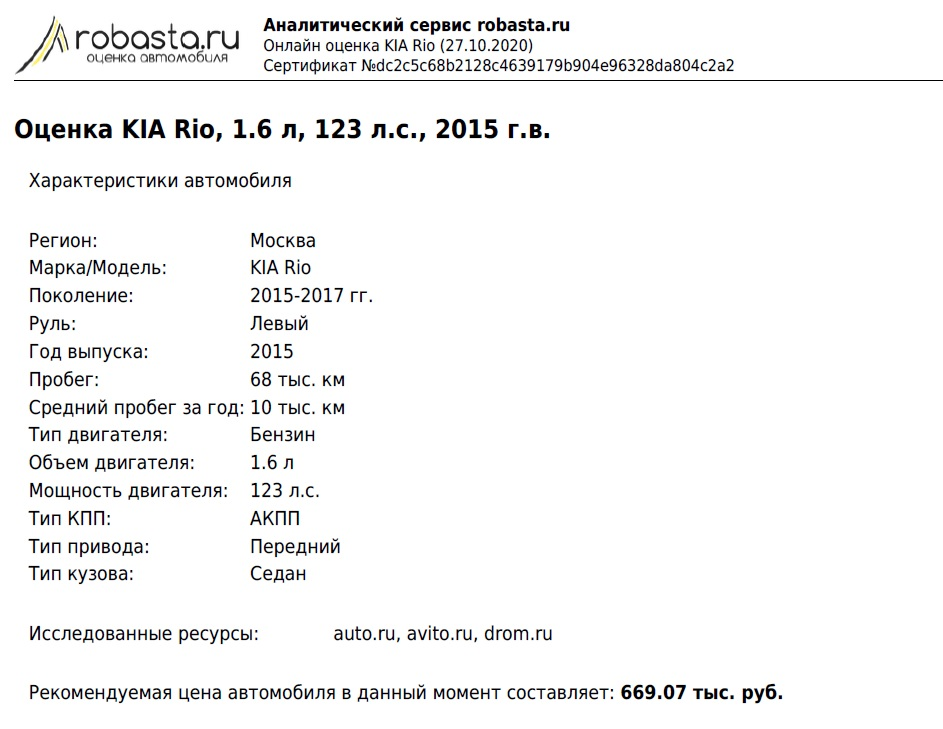

In [164]:
# Вот отчет с этого сайта

from IPython.display import Image
Image('C:\\Users\\user1174\\Downloads\\AutoRU_project\\robasta_kia.jpg')

### Мы получили отличный результат!